***
***
***

# A2: Regression-Based Analysis (Individual)
<strong style="font-size: 24px">Machine Learning</strong><br><br>
<b style="font-size: 18px">Student : Yu Huang</b> <br>
Hult International Business School

***
***
***

<h2>STEP I: Dataset Exploration</h2><br>

<h3>Part I: Fundamental Dataset Exploration</h3><br>

<strong>Import all the needed packages.

Then, load the Apprentice_Chef_Dataset into Python.</strong>

In [1]:
# importing libraries
import pandas                  as pd # data science essentials
import random                  as rand
import matplotlib.pyplot       as plt # data visualization
import seaborn                 as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from  sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.linear_model import LogisticRegression  # logistic regression
import sklearn.linear_model # linear models

# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.svm import SVC


In [2]:
# setting pandas print options
pd.set_option('display.max_rows', 500)     
pd.set_option('display.max_columns', 500)  
pd.set_option('display.width', 1000)       


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(file)

In [3]:
chef.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [4]:
chef.shape

(1946, 29)

 Display general information about each variable, including types and number of non-missing values.

In [5]:
# INFOrmation about each variable
# chef.info()

<strong>Insight from the Info:</strong> There are 29 variables , 1946 customers were recorded. The only missing value is FAMILY_NAME. 

 DESCRIBE each quantitative column using descriptive statistics. Round to two decimal places.

In [6]:
# descriptive statistics
chef.iloc[:,1:].describe().round(2)

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


***
***

<h3>Part II: Missing Value Analysis and Imputation</h3><br>

Show the number of missing values in the dataset.<br>
<em>My goal is to check if a value is missing (i.e. is null) and then add the values together column-wise.</em>


In [7]:
# chef.isnull().sum()

I already checked the only missing value here is Family name. So let me check the name,first name, family name as a DataFrame, find the appropriate way to fulfill the missing value of family name.


<br>
<strong> Flagging Missing Values</strong><br>


In [8]:
# flag the missing value
chef['m_FAMILY_NAME'] = chef['FAMILY_NAME'].isnull().astype(int)
chef.shape

(1946, 30)

<strong> Insights from name: </strong>As far, I found that the name didn't include the family name, only include the job in the bracket. And some of the jobs in bracket is fake. So I flagged the missing family name as m_FAMILY_NAME. 

In [9]:
# # saving results
# chef.to_excel('chef_feature_rich.xlsx',
#                  index = False)
# # loading saved file
# chef = pd.read_excel('chef_feature_rich.xlsx')

***
***

<h3>Part III: Data Types</h3>

Print() the quantiles for each quantitative variable in the dataset. 

In [10]:
# chef.loc[:, :].quantile([0.10, 
#                          0.20,
#                          0.50,
#                          0.80,
#                          0.90,
#                          0.95,
#                          0.97,
#                          1.00])

<strong> Insights from quantiles: </strong>As we see, from the quantile analysis, 80% customers spent less than $3000 in one year for the orders.

In [11]:
#chef['UNIQUE_MEALS_PURCH'].value_counts()

<strong> Insights from 'UNIQUE_MEALS_PURCH': </strong> From counting unique meals purchase, we can see only three meal sets are most popular, and normally less than 9 different meal sets would be ordered. But not sure it is because only 9 different meal sets as best-selling products to be ordered, or Customers' dining habits result in a focus on less than nine products at most. If it is the first reason, I will suggest canceling the 9-18 meal sets and only retaining the classic 9 meal sets to save cost.

In [12]:
#chef['CONTACTS_W_CUSTOMER_SERVICE'].value_counts()

<strong> Insights from 'CONTACTS_W_CUSTOMER_SERVICE': </strong>  Base on times a customer made contact with customer service, we can see the most frequency times to contact with customer service are between 4 to 12.

I try to make different classification here to understand how to engineer the features more efficient.

In [13]:
# """

# # CONTINUOUS OR INTERVAL
#  REVENUE
#  AVG_TIME_PER_SITE_VISIT
#  AVG_PREP_VID_TIME
 
 
# # BINARY
#  CROSS_SELL_SUCCESS
#  MOBILE_NUMBER
#  TASTES_AND_PREFERENCES
#  PACKAGE_LOCKER
#  REFRIGERATED_LOCKER


# # COUNT
#  TOTAL_MEALS_ORDERED
#  UNIQUE_MEALS_PURCH
#  CONTACTS_W_CUSTOMER_SERVICE
#  PRODUCT_CATEGORIES_VIEWED
#  CANCELLATIONS_BEFORE_NOON
#  CANCELLATIONS_AFTER_NOON
#  PC_LOGINS
#  MOBILE_LOGINS
#  WEEKLY_PLAN 
#  LATE_DELIVERIES
#  EARLY_DELIVERIES
#  LARGEST_ORDER_SIZE
#  AVG_CLICKS_PER_VISIT(?)
#  TOTAL_PHOTOS_VIEWED
 

# # CATEGORICAL
#  MASTER_CLASSES_ATTENDED(?? 0,1,2,3)
#  MEDIAN_MEAL_RATING(?? 12345)
 


# # DISCRETE
#  EMAIL
#  NAME
#  FIRST_NAME
#  FAMILY_NAME
#  FOLLOWED_RECOMMENDATIONS_PCT
 

# """

<h3>Part IV: User-Defined Functions</h3><br>


In [14]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='class',
                      max_neighbors=100,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'class'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 100
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
    
    
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img


########################################
# split names
########################################

def split_name(col, df, sep=' ',new_col_name = 'number_of_names'):
    """
    Split the value of a string in series(column of DataFrame), and sum of the number of result items.
    Automatically append summed column into original DataFrame.
    Parameter:
    --------------
    col: The column need to be splited
    df:  DataFrame where column is located
    sep: split by , default ' '
    new_col_name: the name of new column after summing split, default 'number of names'
    --------------
    """
    df[new_col_name] = 0
    for index,val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split())

***
***

<h2>STEP II: Feature Engineering</h2>



<h3>Part I: Working with Names</h3><br>

Define the function that can split name, automatically sum the length of name and add in new column.

In [15]:
# def split_name(col, df, sep=' ',new_col_name = 'number_of_names'):
#     """
#     Split the value of a string in series(column of DataFrame), and sum of the number of result items.
#     Automatically append summed column into original DataFrame.
#     Parameter:
#     --------------
#     col: The column need to be splited
#     df:  DataFrame where column is located
#     sep: split by , default ' '
#     new_col_name: the name of new column after summing split, default 'number of names'
#     --------------
#     """
#     df[new_col_name] = 0
#     for index,val in df.iterrows():
#         df.loc[index, new_col_name] = len(df.loc[index, col].split())

In [16]:
split_name(col='NAME',df=chef)
chef['number_of_names'].value_counts()

2    1201
1     591
3      98
5      35
6      12
4       9
Name: number_of_names, dtype: int64

<strong>Insights from length of names:</strong> As we see, some of the names length are longer than usual,I will flag the out usual length.

In [17]:
chef['number_of_names_out'] = 0
condition = chef.loc[0:,'number_of_names_out'][(chef['number_of_names'] == 5) |
                                               (chef['number_of_names'] == 6) |
                                               (chef['number_of_names'] == 4)]
chef['number_of_names_out'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)

<h3>Part II: Working with Email Addresses</h3><br>




<h4>1: Group email to Categorical Data</h4><br>
1.Create an empty list (placeholder_lst)<br>
2.Loop over each email in placeholder_lst and SPLIT each personal email based on a common attribute ('@' and use it to SPLIT email and domain).<br>
3.APPEND placeholder_lst with split_email.<br>
4.Convert placeholder_lst into a DataFrame.<br>
5.Display the DataFrame and check your results.<br>


In [18]:
placeholder_lst=[]
for index,email in chef.iterrows():
    split_email = chef.loc[index,'EMAIL'].split(sep = '@')
    placeholder_lst.append(split_email)
email_df = pd.DataFrame(placeholder_lst)  
email_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


Concatenate the email domains as a new column in the email_df DataFrame. Name this column email_domain. Then, print the value counts for each domain.

In [19]:
email_df.columns = ['not_use','email_domain']
email_df

,not_use,email_domain
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


Now that email domains have been extracted, let's go one step further to aggregate domains into higher-level categories.  this helps address issues when some categories have small sample sizes.Let's set emails to different group.

In [20]:
# create new dataframe chef_m include column 'domain_group'
chef_m = chef.copy()
# email domain types
personal_email_domains = ['@gmail.com','@yahoo.com','@protonmail.com']
professional_email_domains  = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com',
                               '@chevron.com','@cisco.com','@cocacola.com','@disney.com','@dupont.com'
                               '@exxon.com','@ge.org','@goldmansacs.com','@ibm.com','@intel.com','@jnj.com'
                               '@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com','@nike.com'
                               '@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com'
                               '@verizon.com','@visa.com','@walmart.com']
junk_email_domain = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# placeholder list
placeholder_lst = []    

# looping to group observations by domain type
for domain in email_df['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal_email')
            
        elif '@' + domain in professional_email_domains:
            placeholder_lst.append('professional_email')
        elif '@' + domain in junk_email_domain:
            placeholder_lst.append('junk_email')    
        else:
            placeholder_lst.append('unknown_email')


# concatenating with email_df
email_df['domain_group'] = pd.Series(placeholder_lst)  #if dataframe only one column, that is series
# # concatenating domain_group with chef DataFrame
chef_m = pd.concat([chef_m, email_df['domain_group']],axis=1)
chef_m.shape


(1946, 33)

***
***

<h4>2: Conduct one-hot encoding on email group where this has been deemed appropriate.</h4><br>


In [21]:
# create gummies base on domain group
one_email = pd.get_dummies(chef_m['domain_group'])
one_email

,junk_email,personal_email,professional_email,unknown_email
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1941,0,1,0,0
1942,0,1,0,0
1943,0,1,0,0
1944,0,1,0,0


In [22]:
one_email.sum()

junk_email            389
personal_email        861
professional_email    489
unknown_email         207
dtype: int64

In [23]:
# create new dataframe chef_n include different email types' columns
chef_n = chef.join([one_email])
chef_n.shape

(1946, 36)

In [24]:
chef = chef_n.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis=1)

In [25]:
chef.shape

(1946, 32)

In [26]:
# # saving results
# chef.to_excel('chef_feature_rich.xlsx',
#                  index = False)

In [27]:
# # loading saved file
# chef = pd.read_excel('chef_feature_rich.xlsx')

<br>
<h3>Part III: One-hot encoding for categorial features---'MEDIAN_MEAL_RATING'</h3><br>

In [28]:
#chef.columns

In [29]:
#chef.shape

In [30]:
# create dummies base on median rate
one_MEDIAN_MEAL_RATING = pd.get_dummies(chef['MEDIAN_MEAL_RATING'])

one_MEDIAN_MEAL_RATING.columns =  ['MEDIAN_MEAL_RATING_1',
                                   'MEDIAN_MEAL_RATING_2',
                                   'MEDIAN_MEAL_RATING_3',
                                   'MEDIAN_MEAL_RATING_4',
                                   'MEDIAN_MEAL_RATING_5']
one_MEDIAN_MEAL_RATING

,MEDIAN_MEAL_RATING_1,MEDIAN_MEAL_RATING_2,MEDIAN_MEAL_RATING_3,MEDIAN_MEAL_RATING_4,MEDIAN_MEAL_RATING_5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1941,0,0,1,0,0
1942,0,0,1,0,0
1943,0,1,0,0,0
1944,0,1,0,0,0


In [31]:
chef = chef.join([one_MEDIAN_MEAL_RATING])

In [32]:
chef.shape

(1946, 37)



<br>
<h3>Part IV: Outlier Analysis</h3><br>
let's engineer some new features in the hopes of outperforming our current predictive results.<br><br>
Plot all the features to see the trend.<br>
To save running time, I just comment out the visualization.


In [33]:
# correlation heatmap
# a = chef[['REVENUE','CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
#           'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
#           'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
#           'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 
#           'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
#           'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
#           'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']]
# creating a (Pearson) correlation matrix
# a_corr = a.corr().round(2)
# fig, ax = plt.subplots(figsize=(15,15))
# sns.heatmap(a_corr,
#             cmap = 'coolwarm',
#             square = True,
#             annot = True,
#             linecolor = 'black',
#             linewidths = 0.5)


# plt.savefig('chef Correlation Heatmap.png')
# plt.show()

In [34]:
# ########################
# # Visual EDA (Histograms)
# ########################1

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)                                #subplot(numRows, numCols, plotNum)
# sns.distplot(chef['CROSS_SELL_SUCCESS'],
#              bins = 10,
#              kde  = False,
#              rug  = True,
#              color = 'orange')
# plt.xlabel('CROSS_SELL_SUCCESS')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(chef['TOTAL_MEALS_ORDERED'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('TOTAL_MEALS_ORDERED')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(chef['UNIQUE_MEALS_PURCH'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('UNIQUE_MEALS_PURCH')

# ########################
# plt.subplot(2, 2, 4)
# sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = True,
#              color = 'r')
# plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
# plt.tight_layout()
# plt.savefig('Chef Data Histograms 1 of 7.png')
# plt.show()

# ########################
# ########################2

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
#              bins  = 'fd',
#              kde   = True,
#              color = 'g')
# plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('AVG_TIME_PER_SITE_VISIT')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(chef['MOBILE_NUMBER'],
#              bins  = 20,
#              kde   = False,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('MOBILE_NUMBER')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(chef['CANCELLATIONS_BEFORE_NOON'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'r')
# plt.xlabel('CANCELLATIONS_BEFORE_NOON')
# plt.tight_layout()
# plt.savefig('Chef Data Histograms 2 of 7.png')
# plt.show()

# ########################
# ########################3

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(chef['CANCELLATIONS_AFTER_NOON'],
#              #bins  = 'fd',
#              kde   = False,
#              color = 'y')
# plt.xlabel('CANCELLATIONS_AFTER_NOON')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(chef['TASTES_AND_PREFERENCES'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('TASTES_AND_PREFERENCES')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(chef['PC_LOGINS'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'r')
# plt.xlabel('PC_LOGINS')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(chef['MOBILE_LOGINS'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('MOBILE_LOGINS')
# plt.tight_layout()
# plt.savefig('Housing Data Histograms 3 of 7.png')
# plt.show()

# ########################
# ########################4

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(chef['WEEKLY_PLAN'],
#              bins  = 'fd',
#              kde  = True,
#              color = 'y')
# plt.xlabel('WEEKLY_PLAN')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(chef['EARLY_DELIVERIES'],
#              bins = 10,
#              kde  = False,
#              rug  = True,
#              color = 'orange')
# plt.xlabel('EARLY_DELIVERIES')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(chef['LATE_DELIVERIES'],
#              bins = 'fd',
#              kde  = False,
#              rug  = True,
#              color = 'r')
# plt.xlabel('LATE_DELIVERIES')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(chef['PACKAGE_LOCKER'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('PACKAGE_LOCKER')
# plt.tight_layout()
# plt.savefig('Chef Data Histograms 4 of 7.png')
# plt.show()

# ########################
# ########################5

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(chef['REFRIGERATED_LOCKER'],
#              bins = 10,
#              kde  = False,
#              rug  = True,
#              color = 'r')
# plt.xlabel('REFRIGERATED_LOCKER')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = True,
#              color = 'r')
# plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(chef['AVG_PREP_VID_TIME'],
#              bins = 'fd',
#              kde  = True,
#              rug  = False,
#              color = 'r')
# plt.xlabel('AVG_PREP_VID_TIME')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(chef['LARGEST_ORDER_SIZE'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('LARGEST_ORDER_SIZE')
# plt.tight_layout()
# plt.savefig('Chef Data Histograms 5 of 7.png')
# plt.show()

# ########################
# ########################6

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)                                #subplot(numRows, numCols, plotNum)
# sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
#              bins = 10,
#              kde  = False,
#              rug  = True,
#              color = 'orange')
# plt.xlabel('MASTER_CLASSES_ATTENDED')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(chef['MEDIAN_MEAL_RATING'],
#              bins  = 'fd',
#              color = 'y')
# plt.xlabel('MEDIAN_MEAL_RATING')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('AVG_CLICKS_PER_VISIT')

# ########################
# plt.subplot(2, 2, 4)
# sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = False,
#              color = 'r')
# plt.xlabel('TOTAL_PHOTOS_VIEWED')
# plt.tight_layout()
# plt.savefig('Chef Data Histograms 6 of 7.png')
# plt.show()

# ########################
# ########################7

# plt.subplot(2, 2, 1)
# sns.distplot(chef['REVENUE'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = False,
#              color = 'r')
# plt.xlabel('REVENUE')
# plt.tight_layout()
# plt.savefig('Chef Data Histograms 7 of 7.png')
# plt.show()

# sns.boxplot(x="CROSS_SELL_SUCCESS", y="REVENUE", data=chef)
# plt.show()
# ########################

In [35]:
# # I see the CONTACTS_W_CUSTOMER_SERVICE with additional outlier peak between[10,11,12], I want to flag this little peak
# chef['out_CONTACTS_W_CUSTOMER_SERVICE_outpeak'] = 0
# condition = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE_outpeak'][(chef['CONTACTS_W_CUSTOMER_SERVICE'] == 10) |
#                                                                    (chef['CONTACTS_W_CUSTOMER_SERVICE'] == 11) |
#                                                                    (chef['CONTACTS_W_CUSTOMER_SERVICE'] == 12)]
# chef['out_CONTACTS_W_CUSTOMER_SERVICE_outpeak'].replace(to_replace = condition,
#                                                         value      = 1,
#                                                         inplace    = True)


In [36]:
#chef['MOBILE_LOGINS'].value_counts()

Compare Count of logins on the mobile platform (app) with web platform (website), customers prefer using website to login in.

In [37]:
# I see the MOBILE_LOGINS with obvious peak of [1,2], I want to flag this little peak
chef['flag_MOBILE_LOGINS'] = 0
condition = chef.loc[0:,'flag_MOBILE_LOGINS'][(chef['MOBILE_LOGINS'] == 1) |
                                              (chef['MOBILE_LOGINS'] == 2) ]
chef['flag_MOBILE_LOGINS'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# I see the MOBILE_LOGINS with obvious peak of [1,2], I want to flag this little peak
chef['flag_PC_LOGINS'] = 0
condition = chef.loc[0:,'flag_PC_LOGINS'][(chef['PC_LOGINS'] == 5) |
                                          (chef['PC_LOGINS'] == 6) ]
chef['flag_PC_LOGINS'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

It looks that we delivered BEFORE the alloted delivery time is not performing well. I will flag the EARLY_DELIVERIES as 1167 is 0.

In [38]:
# I see the EARLY_DELIVERIES with obvious peak at 0, I want to flag this little peak
chef['flag_EARLY_DELIVERIES'] = 0
condition = chef.loc[0:,'flag_EARLY_DELIVERIES'][(chef['EARLY_DELIVERIES'] == 0)]
chef['flag_EARLY_DELIVERIES'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

In [39]:
# I see the WEEKLY_PLAN with obvious peak at 0, I want to flag this little peak
chef['flag_WEEKLY_PLAN'] = 0
condition = chef.loc[0:,'flag_WEEKLY_PLAN'][(chef['WEEKLY_PLAN'] == 0)]
chef['flag_WEEKLY_PLAN'].replace(to_replace = condition,
                                 value      = 1,
                                 inplace    = True)

In [40]:
# I see the CANCELLATIONS_AFTER_NOON with obvious peak at 0, I want to flag this little peak
chef['flag_CANCELLATIONS_AFTER_NOON'] = 0
condition = chef.loc[0:,'flag_CANCELLATIONS_AFTER_NOON'][(chef['CANCELLATIONS_AFTER_NOON'] == 0)]
chef['flag_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                              value      = 1,
                                              inplace    = True)

In [41]:
chef.shape

(1946, 42)

we are going to assume outlier thresholds base on above plots. Run the following code to generate the thresholds and create outlier flag columns.

In [42]:
# setting outlier thresholds
TOTAL_MEALS_ORDERED_hi          = 200
UNIQUE_MEALS_PURCH_hi           = 9
CONTACTS_W_CUSTOMER_SERVICE_lo  = 3
CONTACTS_W_CUSTOMER_SERVICE_hi  = 9
AVG_TIME_PER_SITE_VISIT_hi      = 250
CANCELLATIONS_BEFORE_NOON_hi    = 8
CANCELLATIONS_AFTER_NOON_hi     = 2 
WEEKLY_PLAN_hi                  = 15
LATE_DELIVERIES_hi              = 10
AVG_PREP_VID_TIME_hi            = 300
LARGEST_ORDER_SIZE_hi           = 8
MASTER_CLASSES_ATTENDED_hi      = 2
AVG_CLICKS_PER_VISIT_lo         = 8
AVG_CLICKS_PER_VISIT_hi         = 18
TOTAL_PHOTOS_VIEWED_hi          = 500
REVENUE_hi                      = 5000

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
chef['out_TOTAL_MEALS_ORDERED'] = 0                                      
condition_hi = chef.loc[0:,'out_TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi] 
chef['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)


# UNIQUE_MEALS_PURCH
chef['out_UNIQUE_MEALS_PURCH'] = 0                                   
condition_hi = chef.loc[0:,'out_UNIQUE_MEALS_PURCH'][chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi] 
chef['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE_hi
chef['out_CONTACTS_W_CUSTOMER_SERVICE_hi'] = 0
condition_hi = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE_hi'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
chef['out_CONTACTS_W_CUSTOMER_SERVICE_hi'].replace(to_replace = condition_hi,
                                                   value      = 1,
                                                   inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE_lo
chef['out_CONTACTS_W_CUSTOMER_SERVICE_lo'] = 0
condition_lo = chef.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE_lo'][chef['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]
chef['out_CONTACTS_W_CUSTOMER_SERVICE_lo'].replace(to_replace = condition_lo,
                                                   value      = 1,
                                                   inplace    = True) 


# AVG_TIME_PER_SITE_VISIT
chef['out_AVG_TIME_PER_SITE_VISIT'] = 0                                      
condition_hi = chef.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi] 
chef['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# CANCELLATIONS_BEFORE_NOON
chef['out_CANCELLATIONS_BEFORE_NOON'] = 0                                      
condition_hi = chef.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi] 
chef['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)  

# CANCELLATIONS_AFTER_NOON
chef['out_CANCELLATIONS_AFTER_NOON'] = 0                                      
condition_hi = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi] 
chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True) 

#WEEKLY_PLAN
chef['out_WEEKLY_PLAN'] = 0                                      
condition_hi = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_hi] 
chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES
chef['out_LATE_DELIVERIES'] = 0                                      
condition_hi = chef.loc[0:,'out_LATE_DELIVERIES'][chef['LATE_DELIVERIES'] > LATE_DELIVERIES_hi] 
chef['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME
chef['out_AVG_PREP_VID_TIME'] = 0                                      
condition_hi = chef.loc[0:,'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi] 
chef['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                      value      = 1,
                                      inplace    = True)

# LARGEST_ORDER_SIZE
chef['out_LARGEST_ORDER_SIZE'] = 0                                      
condition_hi = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi] 
chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

# MASTER_CLASSES_ATTENDED
chef['out_MASTER_CLASSES_ATTENDED'] = 0                                      
condition_hi = chef.loc[0:,'out_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi] 
chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# AVG_CLICKS_PER_VISIT_hi
chef['out_AVG_CLICKS_PER_VISIT_hi'] = 0
condition_hi = chef.loc[0:,'out_AVG_CLICKS_PER_VISIT_hi'][chef['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
chef['out_AVG_CLICKS_PER_VISIT_hi'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)


# AVG_CLICKS_PER_VISIT_lo
chef['out_AVG_CLICKS_PER_VISIT_lo'] = 0
condition_lo = chef.loc[0:,'out_AVG_CLICKS_PER_VISIT_lo'][chef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]
chef['out_AVG_CLICKS_PER_VISIT_lo'].replace(to_replace = condition_lo,
                                            value      = 1,
                                            inplace    = True)


# TOTAL_PHOTOS_VIEWED
chef['out_TOTAL_PHOTOS_VIEWED'] = 0                                      
condition_hi = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi] 
chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)


# REVENUE
chef['out_REVENUE'] = 0                                      
condition_hi = chef.loc[0:,'out_REVENUE'][chef['REVENUE'] > REVENUE_hi] 
chef['out_REVENUE'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)


In [43]:
# # saving results
# chef.to_excel('chef_feature_rich.xlsx',
#                  index = False)
# # loading saved file
# chef = pd.read_excel('chef_feature_rich.xlsx')


In [44]:
chef.shape

(1946, 58)


***
***

<h2>STEP III: Preparing Building Predictive Models</h2>

***
***

<h3>Part I: Develop a (Pearson) correlation</h3>
Now that we've finished developing features (although we could have developed many, many more), we are ready to start the model building process. Before model step, let's see how the explanatory variables correlate to the response variable.<br>
<br>
<br>
<strong>Purpose: Find the relationship between CROSS_SELL_SUCCESS and all of features, so we can figure out which are most important feature to affect CROSS_SELL_SUCCESS.</strong><br><br>

Write a code to develop a (Pearson) correlation matrix with data rounded to two decimal places. Then, print the results rounded to two decimal places.


In [45]:
# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc[:,'CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                    1.00
FOLLOWED_RECOMMENDATIONS_PCT          0.46
professional_email                    0.17
number_of_names                       0.16
CANCELLATIONS_BEFORE_NOON             0.16
MOBILE_NUMBER                         0.10
TASTES_AND_PREFERENCES                0.08
REFRIGERATED_LOCKER                   0.07
unknown_email                         0.06
flag_CANCELLATIONS_AFTER_NOON         0.05
PC_LOGINS                             0.04
MASTER_CLASSES_ATTENDED               0.04
CONTACTS_W_CUSTOMER_SERVICE           0.04
personal_email                        0.04
PACKAGE_LOCKER                        0.04
flag_PC_LOGINS                        0.03
MEDIAN_MEAL_RATING                    0.03
MEDIAN_MEAL_RATING_5                  0.03
AVG_PREP_VID_TIME                     0.03
out_CONTACTS_W_CUSTOMER_SERVICE_hi    0.03
out_CANCELLATIONS_AFTER_NOON          0.03
m_FAMILY_NAME                         0.02
flag_WEEKLY_PLAN                      0.02
MEDIAN_MEAL

<strong>Insights from Pearson correlation:</strong> <br>
1.The most positive factor is 'FOLLOWED_RECOMMENDATIONS_PCT', which is make sense here. If customers prefer to follow the  recommendations of the service, there is a high probability that they will follow the recommendation to subscribe to new service "Halfway".

2.The second positive factor is 'PROFESSIONAL_EMAIL' , People have to view professional mail in weekdays, which means that they have high chance to glance the news of Halfway subscribe information than that letters come to personal or junk mail.

3.The third positive factor is 'NUMBER_OF_NAMES' - This is an interesting insight: if the length of the customers’ name reflects their status, then it is possible that people of a higher status prefer this romantic promotion to receive
a half bottle of wine from a local California vineyard every Wednesday.

4.The forth positive factor is 'CANCELLATIONS_BEFORE_NOON'. Customers who canceled the order before noon can receive a full refund, this means that they had more satisfied experience on this application, so perhaps they will glad to subscribe more new service.

5.The fifth positive factor is 'MOBILE_NUMBER'. Perhaps the application has message news for mobile numbers to increase the buyer's chance to get the new service subscribers.

6.The most negative factor is 'junk_email'. Which is make sense, since this e-mail is fake and never be read by users and it is possible that they missed the newsletter about the new service.


Analyze the dataset one more time. Drop features where it has been deemed appropriate to do so.

In [46]:
chef = chef.drop(['unknown_email','MEDIAN_MEAL_RATING','MEDIAN_MEAL_RATING_3'],axis=1)

In [47]:
chef.shape

(1946, 55)

***
***

<h3>Part II - Distance Standardization </h3> <br>

Transform the explanatory variables of a dataset so that they are standardized, or put into a form where each feature's variance is measured on the same scale. In general, distance-based algorithms perform much better after standardization. 

In [48]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(chef)


# TRANSFORMING our data after fit
chef_scaled = scaler.transform(chef)


# converting scaled data into a DataFrame
chef_scaled_df = pd.DataFrame(chef_scaled)

# adding labels to the scaled DataFrame
chef_scaled_df.columns = chef.columns

# checking the results
chef_scaled_df.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME,number_of_names,number_of_names_out,junk_email,personal_email,professional_email,MEDIAN_MEAL_RATING_1,MEDIAN_MEAL_RATING_2,MEDIAN_MEAL_RATING_4,MEDIAN_MEAL_RATING_5,flag_MOBILE_LOGINS,flag_PC_LOGINS,flag_EARLY_DELIVERIES,flag_WEEKLY_PLAN,flag_CANCELLATIONS_AFTER_NOON,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE_hi,out_CONTACTS_W_CUSTOMER_SERVICE_lo,out_AVG_TIME_PER_SITE_VISIT,out_CANCELLATIONS_BEFORE_NOON,out_CANCELLATIONS_AFTER_NOON,out_WEEKLY_PLAN,out_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_LARGEST_ORDER_SIZE,out_MASTER_CLASSES_ATTENDED,out_AVG_CLICKS_PER_VISIT_hi,out_AVG_CLICKS_PER_VISIT_lo,out_TOTAL_PHOTOS_VIEWED,out_REVENUE
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.0,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.0,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-1.33,-2.37,-2.86,-0.94,-3.65,-0.59,-0.16,-1.07,-0.17,-0.5,-0.89,-0.58,-0.23,-0.58,-0.39,-0.08,-8.28,-4.68,-1.22,-0.56,-2.44,-0.20,-0.10,-0.41,-0.07,-0.10,-0.04,-0.04,-0.5,-0.14,-0.09,-0.13,-0.06,-0.09,-0.06,-0.21,-0.16
25%,-0.67,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.96,-0.73,-0.93,-0.94,-0.65,-0.59,-0.16,-1.07,-0.17,-0.5,-0.89,-0.58,-0.23,-0.58,-0.39,-0.08,0.12,0.21,-1.22,-0.56,0.41,-0.20,-0.10,-0.41,-0.07,-0.10,-0.04,-0.04,-0.5,-0.14,-0.09,-0.13,-0.06,-0.09,-0.06,-0.21,-0.16
50%,-0.32,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.20,-0.10,-0.28,0.62,-0.22,-0.59,-0.16,0.21,-0.17,-0.5,-0.89,-0.58,-0.23,-0.58,-0.39,-0.08,0.12,0.21,0.82,-0.56,0.41,-0.20,-0.10,-0.41,-0.07,-0.10,-0.04,-0.04,-0.5,-0.14,-0.09,-0.13,-0.06,-0.09,-0.06,-0.21,-0.16
75%,0.49,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.93,0.47,0.36,0.62,0.64,0.37,-0.16,0.21,-0.17,-0.5,1.12,1.73,-0.23,1.15,-0.39,-0.08,0.12,0.21,0.82,-0.56,0.41,-0.20,-0.10,-0.41,-0.07,-0.10,-0.04,-0.04,-0.5,-0.14,-0.09,-0.13,-0.06,-0.09,-0.06,-0.21,-0.16
max,5.88,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,2.05,8.37,4.23,3.73,2.35,8.25,6.36,5.35,5.81,2.0,1.12,1.73,4.32,1.73,2.55,12.19,0.12,0.21,0.82,1.78,0.41,4.93,10.07,2.42,14.67,9.81,25.45,25.45,2.0,7.39,11.35,7.61,17.98,11.75,17.98,4.68,6.22


In [49]:
chef_scaled_df.shape

(1946, 55)

***
***
<h3>Part III: Stratification on explanatory variable and response variable</h3>
<br>
When working with classification problems, it is vitally important to understand the balance of the response variable is balanced.
Declare the explanatory variables in full variables as <strong>logit_full</strong> and significant variables as <strong>logit_sig</strong>, declare the response variable as <strong>chef_target</strong>.

In [50]:
########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE','TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
                   'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
                   'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 
                   'MASTER_CLASSES_ATTENDED', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME',
                   'number_of_names', 'number_of_names_out', 'junk_email', 'personal_email', 'professional_email',
                   'MEDIAN_MEAL_RATING_1', 'MEDIAN_MEAL_RATING_2', 'MEDIAN_MEAL_RATING_4', 'MEDIAN_MEAL_RATING_5', 
                   'flag_MOBILE_LOGINS', 'flag_PC_LOGINS', 'flag_EARLY_DELIVERIES', 'flag_WEEKLY_PLAN',
                   'flag_CANCELLATIONS_AFTER_NOON', 'out_TOTAL_MEALS_ORDERED', 'out_UNIQUE_MEALS_PURCH', 
                   'out_CONTACTS_W_CUSTOMER_SERVICE_hi','out_CONTACTS_W_CUSTOMER_SERVICE_lo', 
                   'out_AVG_TIME_PER_SITE_VISIT', 'out_CANCELLATIONS_BEFORE_NOON', 'out_CANCELLATIONS_AFTER_NOON', 
                   'out_WEEKLY_PLAN', 'out_LATE_DELIVERIES', 'out_AVG_PREP_VID_TIME', 'out_LARGEST_ORDER_SIZE', 
                   'out_MASTER_CLASSES_ATTENDED', 'out_AVG_CLICKS_PER_VISIT_hi', 'out_AVG_CLICKS_PER_VISIT_lo',
                   'out_TOTAL_PHOTOS_VIEWED','out_REVENUE'],
 
# significant variables only
 'logit_sig'    : ['FOLLOWED_RECOMMENDATIONS_PCT', 'professional_email', 'CANCELLATIONS_BEFORE_NOON', 
                   'number_of_names','MOBILE_NUMBER', 'junk_email']

}


chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']
chef_full   =  chef_scaled_df.loc[ : , candidate_dict['logit_full']]
chef_sig    =  chef_scaled_df.loc[ : , candidate_dict['logit_sig']]

***
***

<h3>Part IV - Set up train-test split for both full variables and significant variables </h3>

***
***



In [51]:
# train/test split with the logit_full variables
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']
chef_full   =  chef_scaled_df.loc[ : , candidate_dict['logit_full']]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            chef_full,
            chef_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = chef_target)

In [52]:
# train/test split with the logit_sig variables
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']
chef_sig    =  chef_scaled_df.loc[ : , candidate_dict['logit_sig']]

# train/test split
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
            chef_sig,
            chef_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = chef_target)

***
***

<h3>Part V - Create a Data Frame for model performance </h3> <br>



In [53]:
# creating an empty DataFrame
model_performance = pd.DataFrame(columns=['Model',
                                          'Training Accuracy',
                                          'Testing Accuracy',
                                          'AUC Value'
                                         ])
model_performance 

,Model,Training Accuracy,Testing Accuracy,AUC Value



***
***

<h2>STEP IV:  Models Building</h2>

***
***

<br>
<h3>Part I: Logistic Regression on Hyperparameter Tuning with GridSearchCV </h3><br>

<u>Logistic Regression using GridSearchCV to find best hyperparameters combination results</u><br>
* I tried to using GridSearchCV to find the best combination of hyperparameters for every model and record the performance.
* It is likely to take a long time for GridSearchCV. And it would be better to define a function to fit different models. However, that is advanced skills that I haven't achieved yet. So I decided to GridSearchCV for different models one by one , and in order to save time, I will record the result of GridSearchCV and comment out the process of GridSearchCV.
* There are a lot of parameters, in order to save time, I only turning the most impactful hyperparameters and set small range to search best hyperparameters first.
<br><br>


In [54]:
# ########################################
# # GridSearchCV
# ########################################

# # declaring a hyperparameter space (give GridSearch some values to loop over)
# C_space          = pd.np.arange(0.1, 3.0, 0.1)
# warm_start_space = [True, False]


# # creating a hyperparameter grid
# param_grid = {'C'          : C_space,  # inputting C values to loop over
#               'warm_start' : warm_start_space}   # inputting warm start values to loop over


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(solver = 'lbfgs',
#                               max_iter = 1000,  # more iterations so model converges
#                               random_state = 222)


# # GridSearchCV object
# lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,   # which model type to use (i.e. estimator)
#                            param_grid = param_grid,   # where are the values for the hyperparameters
#                            cv         = 3,             # how many test should GridSearch do?
#                            scoring    = make_scorer(roc_auc_score,
#                                                     needs_threshold = False))  # objective metric


# # FITTING to the FULL DATASET (due to cross-validation)
# # lr_tuned_cv.fit(chef_full, chef_target)  # record the result and then comment out to try explanatory variables
# lr_tuned_cv.fit(chef_sig, chef_target)

# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("chef_sig Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("chef_sig Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [55]:
# Record the result of LogisticRegression Model best parameters
print(f"""
/--------------------------\\
|LogisticRegression Model |
\\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'C': 0.30000000000000004, 'warm_start': True

chef_full Tuned CV AUC      : 
0.6265


Significant explanatory variables best parameters and best AUC score:
--------------------------
chef_sig Tuned Parameters  : 
'C': 1.1, 'warm_start': True

chef_sig Tuned CV AUC      : 
0.5952

""")


/--------------------------\
|LogisticRegression Model |
\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'C': 0.30000000000000004, 'warm_start': True

chef_full Tuned CV AUC      : 
0.6265


Significant explanatory variables best parameters and best AUC score:
--------------------------
chef_sig Tuned Parameters  : 
'C': 1.1, 'warm_start': True

chef_sig Tuned CV AUC      : 
0.5952




Using the best parameters from GridSearchCV result and score a full explanatory variables logistic regression model.

In [56]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned_full = LogisticRegression(solver       = 'lbfgs',
                                   C            =  0.30000000000000004,
                                   warm_start   = True,
                                   max_iter     = 1000,  # more iterations so model converges
                                   random_state = 222)


# FIT step is not needed if we did GridSearchCV already fit, but I will do here as I change the GridSearchCV every model and only use record.
lr_tuned_full.fit(X_train, y_train)

# PREDICTING based on the testing set
lr_tuned_full_pred = lr_tuned_full.predict(X_test)


# SCORING the results
print('chef_full Training ACCURACY:', lr_tuned_full.score(X_train, y_train).round(4))
print('chef_full Testing  ACCURACY:', lr_tuned_full.score(X_test, y_test).round(4))
print('chef_full AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_full_pred).round(4))

chef_full Training ACCURACY: 0.8088
chef_full Testing  ACCURACY: 0.7556
chef_full AUC Score        : 0.7152


write the results of the tuned full explanatory variables logistic model to model_performance.

In [57]:
# declaring model performance objects
lr_train_full_acc = lr_tuned_full.score(X_train, y_train).round(4)
lr_test_full_acc  = lr_tuned_full.score(X_test, y_test).round(4)
lr_full_auc       =  roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_full_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned LogisticRegression',
                          'Training Accuracy'  : lr_train_full_acc,
                          'Testing Accuracy'   : lr_test_full_acc,
                          'AUC Value'          : lr_full_auc},
                          ignore_index = True)


# checking the results
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Tuned LogisticRegression,0.8088,0.7556,0.7152


Using the best parameters from GridSearchCV result and score a full explanatory variables logistic regression model.

In [58]:
# building a model based on hyperparameter tuning results
# chef_sig Tuned Parameters  : 'C': 1.1, 'warm_start': True
# INSTANTIATING a logistic regression model with tuned values
lr_tuned_sig = LogisticRegression(solver       = 'lbfgs',
                                   C            =  1.1,
                                   warm_start   = True,
                                   max_iter     = 1000,  # more iterations so model converges
                                   random_state = 222)


# FIT step is not needed if we did GridSearchCV already fit, but I will do here as I change the GridSearchCV every model and only use record.
lr_tuned_sig.fit(X_train_sig, y_train_sig)

# PREDICTING based on the testing set
lr_tuned_sig_pred = lr_tuned_sig.predict(X_test_sig)


# SCORING the results
print('chef_sig Training ACCURACY:', lr_tuned_sig.score(X_train_sig, y_train_sig).round(4))
print('chef_sig Testing  ACCURACY:', lr_tuned_sig.score(X_test_sig, y_test_sig).round(4))
print('chef_sig AUC Score        :', roc_auc_score(y_true  = y_test_sig,
                                          y_score = lr_tuned_sig_pred).round(4))

chef_sig Training ACCURACY: 0.7786
chef_sig Testing  ACCURACY: 0.7474
chef_sig AUC Score        : 0.7024


I just comment out the significant variables as the model result is not as good as full variables.

In [59]:
# # declaring model performance objects
# lr_train_sig_acc = lr_tuned_sig.score(X_train_sig, y_train_sig).round(4)
# lr_test_sig_acc  = lr_tuned_sig.score(X_test_sig, y_test_sig).round(4)
# lr_sig_auc       =  roc_auc_score(y_true  = y_test_sig,
#                                           y_score = lr_tuned_sig_pred).round(4)


# # appending to model_performance
# model_performance = model_performance.append(
#                           {'Model'             : 'Tuned LogisticRegression with significant explanatory variables',
#                           'Training Accuracy'  : lr_train_sig_acc,
#                           'Testing Accuracy'   : lr_test_sig_acc,
#                           'AUC Value'          : lr_sig_auc},
#                           ignore_index = True)


# # checking the results
# model_performance

<strong>Insights from comparing Logistic Regression using Full explanatory variables and Significant explanatory variables after turning hyperparameter:</strong> As we can see, The result of Full explanatory variables is better than Significant explanatory variables. In the next several models, I will only use full explanatory variables.

***
***

<br>
<h3>Part II:  CART on Hyperparameter Tuning with GridSearchCV</h3><br>


<u>Classification Trees using GridSearchCV to find best hyperparameters combination results</u><br>
* I tried to using GridSearchCV to find the best combination of hyperparameters for Classification Trees model and record the performance.
* It is likely to take a long time for GridSearchCV. So I decided to GridSearchCV for Classification Trees models and then record the result of GridSearchCV and comment out the process of GridSearchCV.
* There are a lot of parameters, in order to save time, I only turning the most impactful hyperparameters and set small range to search best hyperparameters first.
<br><br>

In [60]:
# ########################################
# # GridSearchCV
# ########################################

# # declaring a hyperparameter space
# criterion_space = ['gini', 'entropy']
# splitter_space = ['best', 'random']
# depth_space = pd.np.arange(1, 25)
# leaf_space  = pd.np.arange(1, 100)



# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_space,
#               'splitter'         : splitter_space,
#               'max_depth'        : depth_space,
#               'min_samples_leaf' : leaf_space}


# # INSTANTIATING the model object without hyperparameters
# tuned_tree = DecisionTreeClassifier(random_state = 222)


# # GridSearchCV object
# tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
#                              param_grid = param_grid,
#                              cv         = 3,
#                              scoring    = make_scorer(roc_auc_score,
#                                                       needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# #tuned_tree_cv.fit(chef_full, chef_target)
# tuned_tree_cv.fit(chef_sig, chef_target)

# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_tree_cv.best_params_)
# print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [61]:
# Record the result of LogisticRegression Model best parameters
print(f"""
/--------------------------\\
|CART Model |
\\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 35, 'splitter': 'best'

chef_full Tuned CV AUC      : 
0.6846


Significant explanatory variables best parameters and best AUC score:
--------------------------
chef_sig Tuned Parameters  : 
'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 35, 'splitter': 'best'

chef_sig Tuned CV AUC      : 
 0.6846

""")


/--------------------------\
|CART Model |
\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 35, 'splitter': 'best'

chef_full Tuned CV AUC      : 
0.6846


Significant explanatory variables best parameters and best AUC score:
--------------------------
chef_sig Tuned Parameters  : 
'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 35, 'splitter': 'best'

chef_sig Tuned CV AUC      : 
 0.6846




In [62]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(criterion        = 'gini',
                                    random_state     = 222,
                                    max_depth        = 3,
                                    min_samples_leaf = 35,
                                    splitter         = 'best')
                                   


# FIT step is not needed if we did GridSearchCV already fit, but I will do here as I change the GridSearchCV every model and only use record.
tree_tuned.fit(X_train, y_train)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.817
Testing  ACCURACY: 0.7844
AUC Score        : 0.738


Write the results of the tuned classification model to model_performance.

In [63]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Tree(CART)',
                          'Training Accuracy'  : tree_train_acc,
                          'Testing Accuracy'   : tree_test_acc,
                          'AUC Value'          : tree_auc},
                          ignore_index = True)


# checking the results
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Tuned LogisticRegression,0.8088,0.7556,0.7152
1,Tuned Tree(CART),0.8170,0.7844,0.7380


***
***

<br>
<h3>Part III: Random Forest Classification on Hyperparameter Tuning with GridSearchCV</h3><br>


<br>

<strong>Random Forest with Tuned Hyperparameters</strong><br>
Run the following code to automate hyperparameter optimization for a random forest model.

In [64]:
# ########################################
# # GridSearchCV
# ########################################

# # declaring a hyperparameter space
# estimator_space  = pd.np.arange(10, 500, 20)
# leaf_space       = pd.np.arange(1, 31, 10)
# criterion_space  = ['gini', 'entropy']
# bootstrap_space  = [True, False]
# warm_start_space = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_space,
#               'min_samples_leaf' : leaf_space,
#               'criterion'        : criterion_space,
#               'bootstrap'        : bootstrap_space,
#               'warm_start'       : warm_start_space}


# # INSTANTIATING the model object without hyperparameters
# full_forest_grid = RandomForestClassifier(random_state = 222)


# # GridSearchCV object
# full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
#                               param_grid = param_grid,
#                               cv         = 3,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_forest_cv.fit(chef_full, chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_forest_cv.best_params_)
# print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

In [65]:
# Record the result of LogisticRegression Model best parameters
print(f"""
/--------------------------\\
|RandomForestClassifier Model |
\\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 100, 'warm_start': True

chef_full Tuned AUC      : 
 0.6363

""")


/--------------------------\
|RandomForestClassifier Model |
\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 100, 'warm_start': True

chef_full Tuned AUC      : 
 0.6363




manually input the optimal set of hyperparameters when instantiating the model.

In [66]:
# INSTANTIATING the model object with tuned values
full_rf_tuned = RandomForestClassifier(bootstrap        = False,
                                       criterion        = 'gini',
                                       min_samples_leaf = 1,
                                       n_estimators     = 100,
                                       warm_start       = True,
                                       random_state     = 222)


# FIT step is needed as we are not using .best_estimator
full_rf_tuned_fit = full_rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
full_rf_tuned_pred = full_rf_tuned_fit.predict(X_test)


# SCORING the results
print('full Training ACCURACY:', full_rf_tuned_fit.score(X_train, y_train).round(4))
print('full Testing  ACCURACY:', full_rf_tuned_fit.score(X_test, y_test).round(4))
print('full AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_rf_tuned_pred).round(4))

full Training ACCURACY: 1.0
full Testing  ACCURACY: 0.7741
full AUC Score        : 0.7237


Write the results of the tuned classification model to model_performance.

In [67]:
# declaring model performance objects
rf_train_acc = full_rf_tuned_fit.score(X_train, y_train).round(4)
rf_test_acc  = full_rf_tuned_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = full_rf_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# checking the results
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Tuned LogisticRegression,0.8088,0.7556,0.7152
1,Tuned Tree(CART),0.8170,0.7844,0.7380
2,Tuned Random Forest,1.0000,0.7741,0.7237


***
***

<br>
<h3>Part IV: Gradient Boosted Machines Classification on Hyperparameter Tuning with GridSearchCV</h3><br>


perform hyperparameter optimization on a GBM model using the full dataset.

In [68]:
# ########################################
# # GridSearchCV
# ########################################

# # declaring a hyperparameter space
# learn_space     = pd.np.arange(0.1, 1.1, 0.1)
# estimator_space = pd.np.arange(50, 150, 50)
# depth_space     = pd.np.arange(1, 10)
# subsample_space = pd.np.arange(0.2,1,0.1)

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_space,
#               'max_depth'     : depth_space,
#               'n_estimators'  : estimator_space,
#               'subsample'     : subsample_space}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 222)


# # GridSearchCV object
# full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
#                            param_grid = param_grid,
#                            cv         = 3,
#                            scoring    = make_scorer(roc_auc_score,
#                                         needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(chef_full, chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("full Tuned Parameters  :", full_gbm_cv.best_params_)
# print("full Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [69]:
# Record the result of LogisticRegression Model best parameters
print("""
/--------------------------\\
|Gradient Boosted Machines Model |
\\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'learning_rate': 1.0000000000000002, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.5

chef_full Tuned AUC      : 
0.655

""")


/--------------------------\
|Gradient Boosted Machines Model |
\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'learning_rate': 1.0000000000000002, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.5

chef_full Tuned AUC      : 
0.655




Manually input the optimal set of hyperparameters when instantiating the model.

In [70]:
# INSTANTIATING the model object without hyperparameters
full_gbm_tuned = GradientBoostingClassifier(learning_rate = 0.2,
                                            max_depth     = 1,
                                            n_estimators  = 50,
                                            subsample     = 0.5,
                                            random_state  = 222)


# FIT step is needed as we are not using .best_estimator
full_gbm_tuned_fit = full_gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_tuned_pred = full_gbm_tuned_fit.predict(X_test)


# SCORING the results
print('full Training ACCURACY:', full_gbm_tuned_fit.score(X_train, y_train).round(4))
print('full Testing  ACCURACY:', full_gbm_tuned_fit.score(X_test, y_test).round(4))
print('full AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_tuned_pred).round(4))

full Training ACCURACY: 0.8389
full Testing  ACCURACY: 0.807
full AUC Score        : 0.758


In [71]:
# declaring model performance objects
gbm_train_acc = full_gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_test_acc  = full_gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc},
                          ignore_index = True)


# checking the results
model_performance

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Tuned LogisticRegression,0.8088,0.7556,0.7152
1,Tuned Tree(CART),0.8170,0.7844,0.7380
2,Tuned Random Forest,1.0000,0.7741,0.7237
3,Tuned GBM,0.8389,0.8070,0.7580


***
***

<br>
<h3>Part V: Support Vector Machine Classification on Hyperparameter Tuning with GridSearchCV</h3><br>
SVC using GridSearchCV to find best hyperparameters combination results<br>
<br><br>


In [72]:
# ########################################
# # GridSearchCV
# ########################################

# # declaring a hyperparameter space 
# C_space         = [1e-3, 1e-2, 1e-1, 0.8, 1, 10, 100] #pd.np.arange(0.1,10,0.1)
# gamma_space     = [0.5,0.1,0.01,0.001,0.0001]
# kernel_space    = ['linear','rbf']
# # depth_space     = pd.np.arange(1, 10)
# # subsample_space = pd.np.arange(0.5,1,0.1)

# # creating a hyperparameter grid
# param_grid = {'C'             : C_space,
#               'gamma'         : gamma_space,
#               'kernel'        : kernel_space}


# # INSTANTIATING the model object without hyperparameters
# full_svc_grid = SVC(random_state = 222)  
                    


# # GridSearchCV object
# full_svc_cv = GridSearchCV(estimator  = full_svc_grid,
#                            param_grid = param_grid,
#                            cv         = 3,
#                            n_jobs    = 8,
#                            verbose   =1,
#                            scoring    = make_scorer(roc_auc_score,
#                                         needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_svc_cv.fit(chef_full, chef_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("full Tuned Parameters  :", full_svc_cv.best_params_)
# print("full Tuned Training AUC:", full_svc_cv.best_score_.round(4))

In [73]:
# Record the result of LogisticRegression Model best parameters
print(f"""
/--------------------------\\
|Support Vector Machine Model |
\\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'C': 100, 'gamma': 0.01, 'kernel': 'rbf'

chef_full Tuned AUC      : 
 0.6279

""")


/--------------------------\
|Support Vector Machine Model |
\--------------------------/

Full explanatory variables best parameters and best AUC score:
-----------
chef_full Tuned Parameters  : 
'C': 100, 'gamma': 0.01, 'kernel': 'rbf'

chef_full Tuned AUC      : 
 0.6279




Develop a <a href="https://https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC">SVC</a> model with turning hyperparameters.

In [74]:
# INSTANTIATING the model object with tuned values
full_svc_tuned = SVC( C   = 0.01,
                   gamma  = 1,
                   kernel ='linear',
                   random_state     = 222)


# FIT step is needed as we are not using .best_estimator
full_svc_tuned_fit = full_svc_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
full_svc_tuned_pred = full_svc_tuned_fit.predict(X_test)


# SCORING the results
print('full Training ACCURACY:', full_svc_tuned_fit.score(X_train, y_train).round(4))
print('full Testing  ACCURACY:', full_svc_tuned_fit.score(X_test, y_test).round(4))
print('full AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_rf_tuned_pred).round(4))

full Training ACCURACY: 0.8129
full Testing  ACCURACY: 0.77
full AUC Score        : 0.7237


However, I got a better result than gridsearch, if I use C=0.01 , gamma  = 1,kernel ='linear', so I decide to use parameter above.

In [75]:
# declaring model performance objects
svc_train_acc = full_svc_tuned_fit.score(X_train, y_train).round(4)
svc_test_acc  = full_svc_tuned_fit.score(X_test, y_test).round(4)
svc_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_svc_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned SVM',
                          'Training Accuracy'  : svc_train_acc,
                          'Testing Accuracy'   : svc_test_acc,
                          'AUC Value'          : svc_auc},
                          ignore_index = True)


# checking the results
model_performance.round(3)

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Tuned LogisticRegression,0.809,0.756,0.715
1,Tuned Tree(CART),0.817,0.784,0.738
2,Tuned Random Forest,1.000,0.774,0.724
3,Tuned GBM,0.839,0.807,0.758
4,Tuned SVM,0.813,0.770,0.710


***
***

<br>
<h3>Part VI: KNN Classification</h3><br>
KNN with optimal number of neighbors<br>
<br><br>


To save time, I just comment out the visualization and using the best hyperparameter.

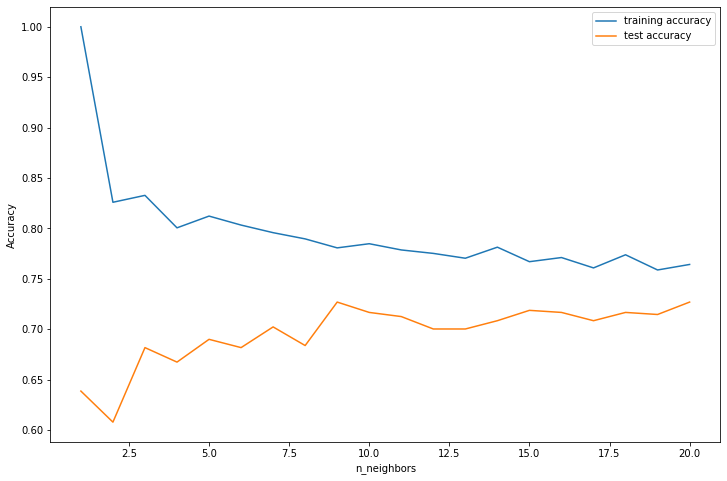

The optimal number of neighbors is: 9


In [76]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors( chef.loc[ : , candidate_dict['logit_full']],
                                  chef_target,
                                  standardize = True,
                                  pct_test=0.25,
                                  seed=802,
                                  response_type='class',
                                  max_neighbors=20,
                                  show_viz=True)

In [77]:
# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors =opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train, y_train)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', knn_opt.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', knn_opt.score(X_test,y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.7862
Testing  ACCURACY: 0.7228
AUC Score        : 0.6419


In [78]:
# declaring model performance objects
knn_train_acc = knn_fit.score(X_train, y_train).round(4)
knn_test_acc  = knn_fit.score(X_test, y_test).round(4)
knn_auc       = roc_auc_score(y_true  = y_test,
                              y_score = knn_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'KNN',
                          'Training Accuracy'  : knn_train_acc,
                          'Testing Accuracy'   : knn_test_acc,
                          'AUC Value'          : knn_auc},
                          ignore_index = True)


# checking the results
model_performance.round(3)

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Tuned LogisticRegression,0.809,0.756,0.715
1,Tuned Tree(CART),0.817,0.784,0.738
2,Tuned Random Forest,1.000,0.774,0.724
3,Tuned GBM,0.839,0.807,0.758
4,Tuned SVM,0.813,0.770,0.710
5,Tuned KNN,0.786,0.723,0.642


***
***

<h2>STEP V: Compare Results</h2> <br>

Let's compare the results of each model. In the interest of time, this code has already been written.

In [79]:
# comparing results

model_performance.round(3)


# sending model results to Excel
# model_performance.to_excel('classification_model_performance.xlsx',
#                            index = False)



,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Tuned LogisticRegression,0.809,0.756,0.715
1,Tuned Tree(CART),0.817,0.784,0.738
2,Tuned Random Forest,1.000,0.774,0.724
3,Tuned GBM,0.839,0.807,0.758
4,Tuned SVM,0.813,0.770,0.710
5,Tuned KNN,0.786,0.723,0.642
